In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jp797498e/twitter-entity-sentiment-analysis")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'twitter-entity-sentiment-analysis' dataset.
Path to dataset files: /kaggle/input/twitter-entity-sentiment-analysis


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_training = pd.read_csv(path + '/twitter_training.csv',encoding='utf-8')
data_training.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [18]:
data_val = pd.read_csv(path + '/twitter_validation.csv',encoding='utf-8')
data_val.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [20]:
data_training.columns = ['id','entity','sentiment','comments']
data_val.columns = ['id','entity','sentiment','comments']

In [21]:
data_training

,id,entity,sentiment,comments
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [23]:
data_val

,id,entity,sentiment,comments
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [25]:
import tensorflow as tf
from tensorflow.keras import layers,models
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sentence_transformers import SentenceTransformer

In [26]:
data_training = data_training[['sentiment','comments']]
data_val = data_val[['sentiment','comments']]

In [27]:
data_training

,sentiment,comments
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
74676,Positive,Just realized that the Windows partition of my...
74677,Positive,Just realized that my Mac window partition is ...
74678,Positive,Just realized the windows partition of my Mac ...
74679,Positive,Just realized between the windows partition of...


In [28]:
data_training['sentiment'].value_counts()

,count
sentiment,
Negative,22542
Positive,20831
Neutral,18318
Irrelevant,12990


In [29]:
sentiment_class = {'Negative': 'Negative','Positive': 'Positive','Neutral':'Neutral','Irrelevant':'Neutral'}

In [30]:
data_training['sentiment'] = data_training['sentiment'].map(sentiment_class)
data_val['sentiment'] = data_val['sentiment'].map(sentiment_class)

/tmp/ipython-input-4191046482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_training['sentiment'] = data_training['sentiment'].map(sentiment_class)
/tmp/ipython-input-4191046482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val['sentiment'] = data_val['sentiment'].map(sentiment_class)


In [31]:
data_val['sentiment'].value_counts()

,count
sentiment,
Neutral,456
Positive,277
Negative,266


In [32]:
data_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  74681 non-null  object
 1   comments   73995 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [34]:
data_training.isna().sum()

,0
sentiment,0
comments,686


In [39]:
data_training = data_training.dropna(subset=['comments'])

In [40]:
data_training['comments'].isna().sum()

np.int64(0)

In [35]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  999 non-null    object
 1   comments   999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


In [36]:
data_val.isna().sum()

,0
sentiment,0
comments,0


### BERT ###

In [51]:
bert_model = SentenceTransformer("all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [52]:
x_train = bert_model.encode(data_training['comments'].tolist(),batch_size=32,show_progress_bar=True)
x_val = bert_model.encode(data_val['comments'].tolist(),batch_size=32,show_progress_bar=True)

Batches:   0%|          | 0/2313 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [53]:
le = LabelEncoder()
y_train = le.fit_transform(data_training["sentiment"])
y_val = le.transform(data_val["sentiment"])

In [54]:
print(f'Classes :{le.classes_} ')

Classes :['Negative' 'Neutral' 'Positive'] 


In [55]:
model = models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(3, activation="softmax")
])

In [56]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

In [57]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,843 (515.01 KB)

 Trainable params: 131,843 (515.01 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
history = model.fit(
    x_train,y_train,
    validation_data = (x_val,y_val),
    epochs = 10,
    batch_size = 32,
    verbose = 1
)

Epoch 1/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6152 - loss: 0.8244 - val_accuracy: 0.7638 - val_loss: 0.5631
Epoch 2/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7377 - loss: 0.6233 - val_accuracy: 0.8529 - val_loss: 0.3801
Epoch 3/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8094 - loss: 0.4782 - val_accuracy: 0.9079 - val_loss: 0.2764
Epoch 4/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8484 - loss: 0.3864 - val_accuracy: 0.9359 - val_loss: 0.2189
Epoch 5/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8660 - loss: 0.3398 - val_accuracy: 0.9299 - val_loss: 0.2057
Epoch 6/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8840 - loss: 0.2974 - val_accuracy: 0.9369 - val_loss: 0.1958
Epoch 7/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8960 - loss: 0.2708 - val_accuracy: 0.9489 - val_loss: 0.1631
Epoch 8/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8974 - loss: 0

In [59]:
loss,accuracy = model.evaluate(x_val,y_val,verbose =0)
print(f'Accuracy:{accuracy : .2f} ')

Accuracy: 0.95 


In [60]:
y_pred_probs = model.predict(x_val)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred_labels = le.inverse_transform(y_pred)
y_true_labels = le.inverse_transform(y_val)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [61]:
print(classification_report(y_true_labels, y_pred_labels))

              precision    recall  f1-score   support

    Negative       0.95      0.94      0.95       266
     Neutral       0.97      0.94      0.95       456
    Positive       0.91      0.96      0.93       277

    accuracy                           0.95       999
   macro avg       0.94      0.95      0.94       999
weighted avg       0.95      0.95      0.95       999



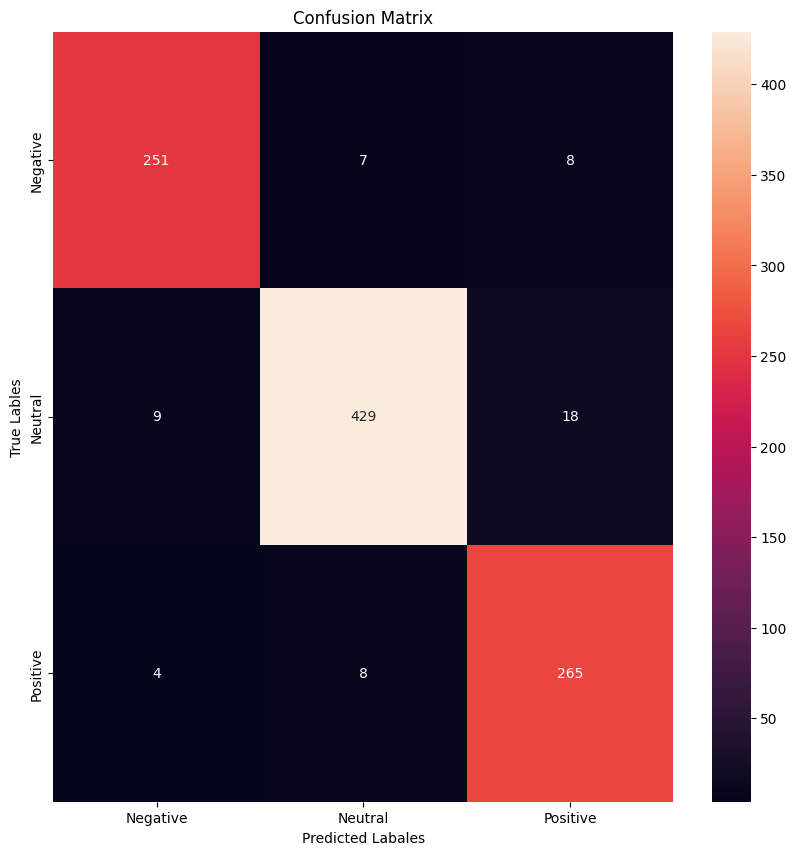

In [68]:
cm = confusion_matrix(y_true_labels,y_pred_labels , labels = le.classes_)
plt.figure(figsize = (10,10))
sns.heatmap(cm,annot=True, fmt="d",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labales')
plt.ylabel("True Lables")
plt.show()

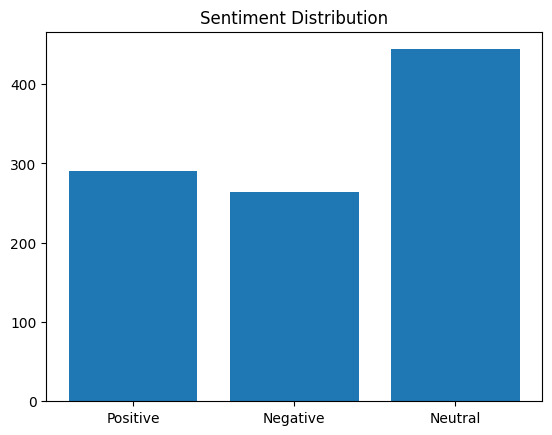

In [70]:
labels = ['Positive','Negative','Neutral']
counts= [np.count_nonzero(y_pred_labels=='Positive'),
         np.count_nonzero(y_pred_labels =='Negative'),
         np.count_nonzero(y_pred_labels=='Neutral')]

plt.bar(labels,counts)
plt.title('Sentiment Distribution')
plt.show()

In [71]:
import joblib
model.save('sentiment_model.keras')
model.save('sentiment_model.h5')

joblib.dump(le,'label_encoder.joblib')

joblib.dump(bert_model,'sentence_encoder.joblib')

print('all models are saved')

all models are saved
